In [6]:
import numpy as np
import pandas as pd
import datetime as dt
import talib as ta
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [16]:
ticker = 'BABA'
start = dt.datetime(2015,1,1).date()
end = dt.datetime.today().date()
df = pd.DataFrame(yf.download([ticker],start,end))
df = df.dropna()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,106.459999,106.470001,103.690002,103.940002,103.940002,10221600
2015-01-02,104.239998,104.720001,102.519997,103.599998,103.599998,12303400
2015-01-05,102.760002,103.019997,99.900002,101.000000,101.000000,18337000
2015-01-06,101.250000,103.849998,100.110001,103.320000,103.320000,15720400
2015-01-07,104.589996,104.739998,102.029999,102.129997,102.129997,11052200


In [17]:
# ## Create Indicators
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [18]:
# ## Logistic Regression

# ### Split the Dataset and Instantiate Logistic Regression
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

probability = model.predict_proba(X_test)
#print(probability)

predicted = model.predict(X_test)

print(metrics.confusion_matrix(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

print(model.score(X_test,y_test))  

cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


[[  0 246]
 [  0 255]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       246
           1       0.51      1.00      0.67       255

    accuracy                           0.51       501
   macro avg       0.25      0.50      0.34       501
weighted avg       0.26      0.51      0.34       501

0.5089820359281437
[0.50299401 0.50299401 0.50299401 0.50898204 0.50898204 0.50898204
 0.50898204 0.5060241  0.5060241  0.5060241 ]
0.5062982468797345


/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
df['Predicted_Signal'] = model.predict(X)
df['cc_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_cc_returns = np.cumsum(df[split:]['cc_returns'])

df['Startegy_returns'] = df['cc_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])


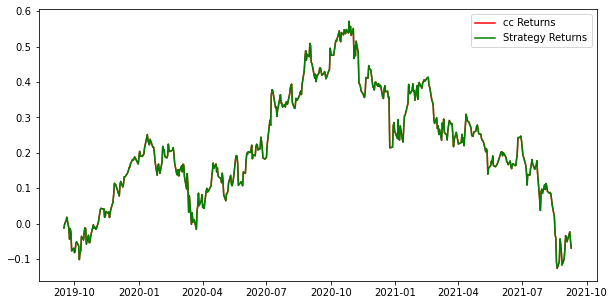

In [20]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_cc_returns, color='r',label = 'cc Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [21]:
df['Predicted_Signal']

Date
2015-01-28    1
2015-01-29    1
2015-01-30    1
2015-02-02    1
2015-02-03    1
2015-02-04    1
2015-02-05    1
2015-02-06    1
2015-02-09    1
2015-02-10    1
2015-02-11    1
2015-02-12    1
2015-02-13    1
2015-02-17    1
2015-02-18    1
2015-02-19    1
2015-02-20    1
2015-02-23    1
2015-02-24    1
2015-02-25    1
2015-02-26    1
2015-02-27    1
2015-03-02    1
2015-03-03    1
2015-03-04    1
2015-03-05    1
2015-03-06    1
2015-03-09    1
2015-03-10    1
2015-03-11    1
2015-03-12    1
2015-03-13    1
2015-03-16    1
2015-03-17    1
2015-03-18    1
2015-03-19    1
2015-03-20    1
2015-03-23    1
2015-03-24    1
2015-03-25    1
2015-03-26    1
2015-03-27    1
2015-03-30    1
2015-03-31    1
2015-04-01    1
2015-04-02    1
2015-04-06    1
2015-04-07    1
2015-04-08    1
2015-04-09    1
2015-04-10    1
2015-04-13    1
2015-04-14    1
2015-04-15    1
2015-04-16    1
2015-04-17    1
2015-04-20    1
2015-04-21    1
2015-04-22    1
2015-04-23    1
2015-04-24    1
2015-04-27    1
201

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df['Predicted_Signal'])

Date
2015-01-28    1
2015-01-29    1
2015-01-30    1
2015-02-02    1
2015-02-03    1
2015-02-04    1
2015-02-05    1
2015-02-06    1
2015-02-09    1
2015-02-10    1
2015-02-11    1
2015-02-12    1
2015-02-13    1
2015-02-17    1
2015-02-18    1
2015-02-19    1
2015-02-20    1
2015-02-23    1
2015-02-24    1
2015-02-25    1
2015-02-26    1
2015-02-27    1
2015-03-02    1
2015-03-03    1
2015-03-04    1
2015-03-05    1
2015-03-06    1
2015-03-09    1
2015-03-10    1
2015-03-11    1
2015-03-12    1
2015-03-13    1
2015-03-16    1
2015-03-17    1
2015-03-18    1
2015-03-19    1
2015-03-20    1
2015-03-23    1
2015-03-24    1
2015-03-25    1
2015-03-26    1
2015-03-27    1
2015-03-30    1
2015-03-31    1
2015-04-01    1
2015-04-02    1
2015-04-06    1
2015-04-07    1
2015-04-08    1
2015-04-09    1
2015-04-10    1
2015-04-13    1
2015-04-14    1
2015-04-15    1
2015-04-16    1
2015-04-17    1
2015-04-20    1
2015-04-21    1
2015-04-22    1
2015-04-23    1
2015-04-24    1
2015-04-27    1
201